In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load up titanic.csv

df = pd.read_csv("titanic.csv")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
#Checking data output and some statistical information
print(df.head())
print(df.describe())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [35]:
#handle missing data and change add dummy columns for Embarked

print("\nTotal missing per Column\n")
missing_count = df.isnull().sum()
print(missing_count)

#dropping cabin since majority of records are blank
df.drop('Cabin', axis=1, inplace=True)

#Not too many are missing and took the median
df['Age'] = df['Age'].fillna(df['Age'].median())  # Replace with median age

#Replacing missing data with highest count
df["Embarked"] = df["Embarked"].fillna('S')
# Double-check to make sure there are no more missing values
print(df['Embarked'].value_counts(dropna=False))




Total missing per Column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Survived       1.000000
Sex_encoded    0.543351
Embarked_C     0.168240
Embarked_Q     0.003650
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


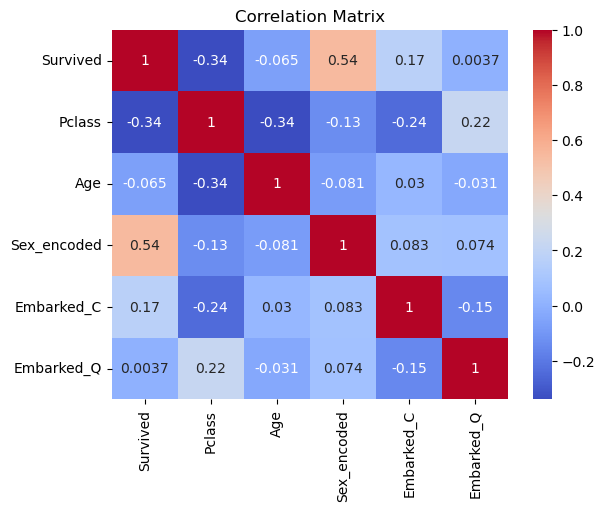

C:\Users\juleigar\AppData\Local\Temp\ipykernel_35020\2426534381.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_sex,  palette='pastel', legend= False)


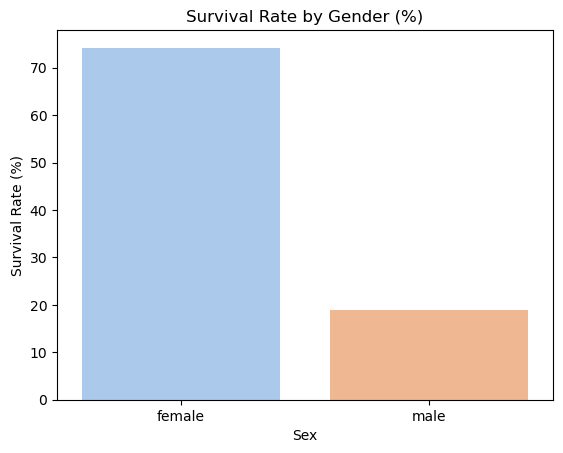

C:\Users\juleigar\AppData\Local\Temp\ipykernel_35020\2426534381.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survival_class, palette='pastel', legend = False)


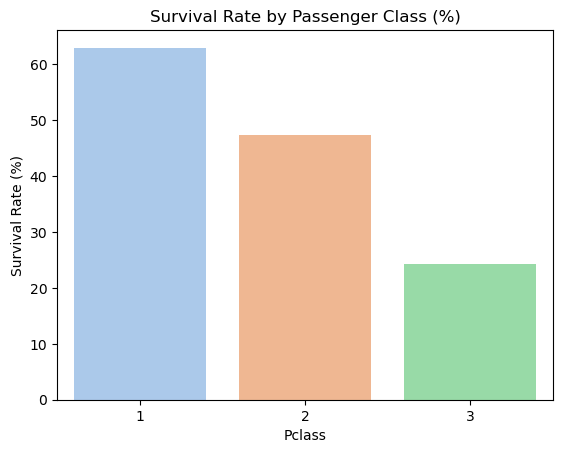

C:\Users\juleigar\AppData\Local\Temp\ipykernel_35020\2426534381.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=survival_age, palette='pastel', legend =False)


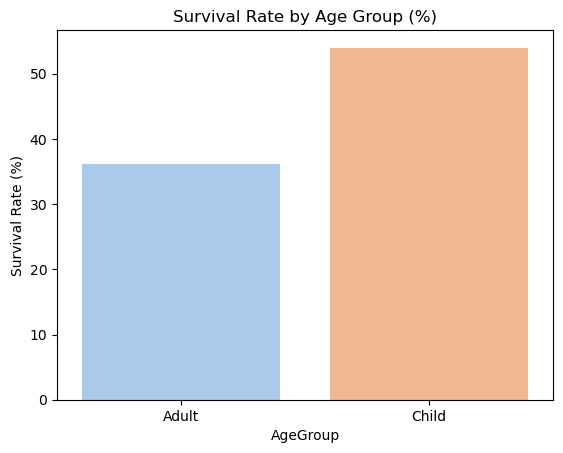

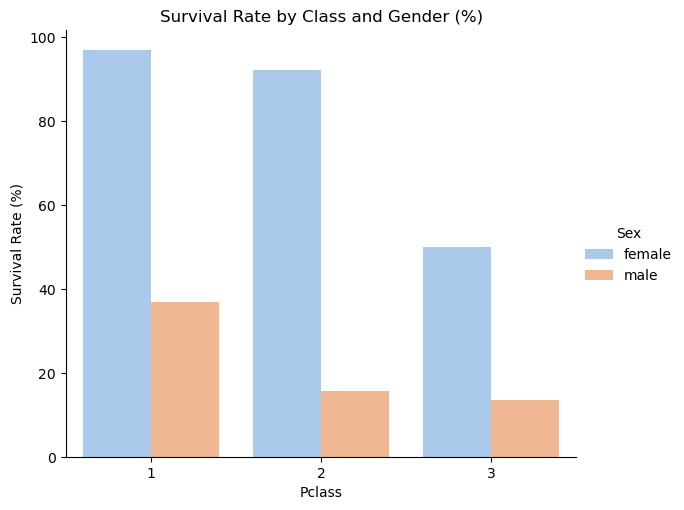

C:\Users\juleigar\AppData\Local\Temp\ipykernel_35020\2426534381.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=family_survival, palette='pastel')


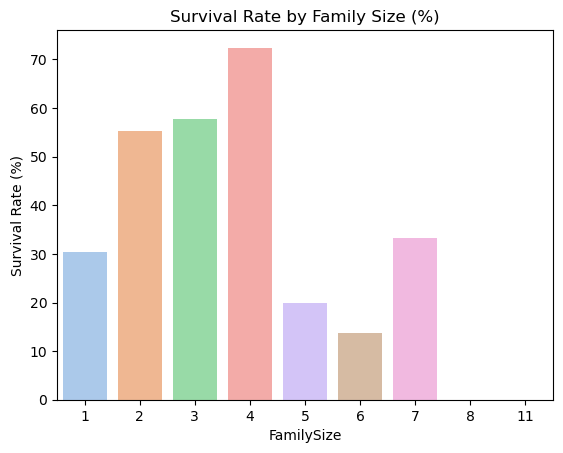

In [ ]:
#Create dummy columns to deal with categorical
# Reorder categories so S is first
df['Embarked'] = pd.Categorical(df['Embarked'], categories=['S', 'C', 'Q'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
# Map 'male' → 0, 'female' → 1
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# Check it worked
df[['Sex', 'Sex_encoded']].head()

corr = df[['Survived','Pclass','Age','Sex_encoded','Embarked_C','Embarked_Q']].corr()
print(corr['Survived'].sort_values(ascending=False))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# Create AgeGroup: Child (<18) or Adult (>=18)
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# --- Survival % by Sex ---
survival_sex = df.groupby('Sex')['Survived'].mean().reset_index()
survival_sex['Survived'] *= 100
sns.barplot(x='Sex', y='Survived', data=survival_sex,  palette='pastel', legend= False)
plt.title("Survival Rate by Gender (%)")
plt.ylabel("Survival Rate (%)")
plt.show()

# --- Survival % by Pclass ---
survival_class = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_class['Survived'] *= 100
sns.barplot(x='Pclass', y='Survived', data=survival_class, palette='pastel', legend = False)
plt.title("Survival Rate by Passenger Class (%)")
plt.ylabel("Survival Rate (%)")
plt.show()

# --- Survival % by AgeGroup ---
survival_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
survival_age['Survived'] *= 100
sns.barplot(x='AgeGroup', y='Survived', data=survival_age, palette='pastel', legend =False)
plt.title("Survival Rate by Age Group (%)")
plt.ylabel("Survival Rate (%)")
plt.show()

# --- Survival % by Class + Sex ---
survival_combo = df.groupby(['Pclass','Sex'])['Survived'].mean().reset_index()
survival_combo['Survived'] *= 100
sns.catplot(x='Pclass', y='Survived', hue='Sex',
            data=survival_combo, kind='bar', height=5, aspect=1.2, palette='pastel')
plt.title("Survival Rate by Class and Gender (%)")
plt.ylabel("Survival Rate (%)")
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # include self
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()
family_survival['Survived'] *= 100  # convert to percentage
# Plot
sns.barplot(x='FamilySize', y='Survived', data=family_survival, palette='pastel')
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Size (%)")
plt.show()



What is the most important factor in determining whether a person was likely to
survive the sinking of the Titanic?
The most significant factors would be gender and class. Females from upper class were more likely to survive. Among females, those in 1st class had the highest survival rate.

In the movie, the upper-class passengers were given preference on lifeboats.
Does this show in the data?
Survival rate was highest in 1st class; 63% of 1st class passengers survived

Women and children first”. Was this the case?
Women indeed had a much higher survival rate than men.
Children’s survival rate was also higher than adults.
Although only 113 children were on board, over 52% survived, supporting the "women and children first’ principle".

Add one other observation that you have noted in the dataset.
Passengers traveling in families of 4 had the highest survival rate according to the survival-by-family-size plot. Smaller families of 2 or 3 also had relatively high survival, but larger families (5 or more) had lower survival rates, likely due to difficulties coordinating during evacuation.